<a href="https://colab.research.google.com/github/DeveloperHasanKhan/DeveloperHasanKhan/blob/main/Towards_Transparent_AI_An_Explainable_Ensemble_Based_Approach_for_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Towards Transparent AI: An Explainable Ensemble-Based Approach for Breast Cancer Prediction**

# **Font_Family**

In [ ]:
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

# **Import Libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score,
    matthews_corrcoef, cohen_kappa_score, fbeta_score, brier_score_loss, log_loss,
    classification_report, precision_recall_curve, PrecisionRecallDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    VotingClassifier, StackingClassifier, ExtraTreesClassifier,BaggingClassifier
)



# **Importing_Dataset**

In [53]:

from google.colab import drive

# Mount google dirve

drive.mount('/content/drive')

import warnings
warnings.filterwarnings


# Access the file in Google Drive

df = pd.read_csv('/content/drive/MyDrive/datasets1/Breast_Cancer_Wisconsin_Dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Basic Information

In [54]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [55]:
df.shape

(569, 33)

In [56]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [57]:
#Drop unnecessary columns
df = df.drop(['id','Unnamed: 32'], axis=1)

In [24]:
df.shape

(569, 31)

In [58]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

# **Handle Missing Values**

In [59]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)


# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled


Columns with Missing Values:
 Series([], dtype: int64)
Missing values after filling:
 0


In [34]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# **Data Preprocessing**

In [60]:

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Preprocessing steps
# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)


# Separate numerical and categorical columns, excluding the 'Default' column from categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
#cat_cols = cat_cols.difference(['diagnosis'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Ensure all categorical values are strings
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Display the processed DataFrame
df


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1     1.097064     -2.073335        1.269934   0.984375   
1            1     1.829821     -0.353632        1.685955   1.908708   
2            1     1.579888      0.456187        1.566503   1.558884   
3            1    -0.768909      0.253732       -0.592687  -0.764464   
4            1     1.750297     -1.151816        1.776573   1.826229   
..         ...          ...           ...             ...        ...   
564          1     2.110995      0.721473        2.060786   2.343856   
565          1     1.704854      2.085134        1.615931   1.723842   
566          1     0.702284      2.045574        0.672676   0.577953   
567          1     1.838341      2.336457        1.982524   1.735218   
568          0    -1.808401      1.221792       -1.814389  -1.347789   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.568466          3.283515        2.652874             2.532475   
1          -0.826962         -0.487072       -0.023846             0.548144   
2           0.942210          1.052926        1.363478             2.037231   
3           3.283553          3.402909        1.915897             1.451707   
4           0.280372          0.539340        1.371011             1.428493   
..               ...               ...             ...                  ...   
564         1.041842          0.219060        1.947285             2.320965   
565         0.102458         -0.017833        0.693043             1.263669   
566        -0.840484         -0.038680        0.046588             0.105777   
567         1.525767          3.272144        3.296944             2.658866   
568        -3.112085         -1.150752       -1.114873            -1.261820   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         2.217515  ...      1.886690      -1.359293         2.303601   
1         0.001392  ...      1.805927      -0.369203         1.535126   
2         0.939685  ...      1.511870      -0.023974         1.347475   
3         2.867383  ...     -0.281464       0.133984        -0.249939   
4        -0.009560  ...      1.298575      -1.466770         1.338539   
..             ...  ...           ...            ...              ...   
564      -0.312589  ...      1.901185       0.117700         1.752563   
565      -0.217664  ...      1.536720       2.047399         1.421940   
566      -0.809117  ...      0.561361       1.374854         0.579001   
567       2.137194  ...      1.961239       2.237926         2.303601   
568      -0.820070  ...     -1.410893       0.764190        -1.432735   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2.001237          1.307686           2.616665         2.109526   
1      1.890489         -0.375612          -0.430444        -0.146749   
2      1.456285          0.527407           1.082932         0.854974   
3     -0.550021          3.394275           3.893397         1.989588   
4      1.220724          0.220556          -0.313395         0.613179   
..          ...               ...                ...              ...   
564    2.015301          0.378365          -0.273318         0.664512   
565    1.494959         -0.691230          -0.394820         0.236573   
566    0.427906         -0.809587           0.350735         0.326767   
567    1.653171          1.430427           3.904848         3.197605   
568   -1.075813         -1.859019          -1.207552        -1.305831   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                2.296076        2.750622                 1.937015  
1                1.087084       -0.243890                 0.281190  
2                1.955000        1.152255                 0.201391  
3                2.175786        6.046041                 4.935010  
4                0.729259       -0.868353                -0.397100  
..                    .

In [36]:
# After processing

df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# **Visualizations**

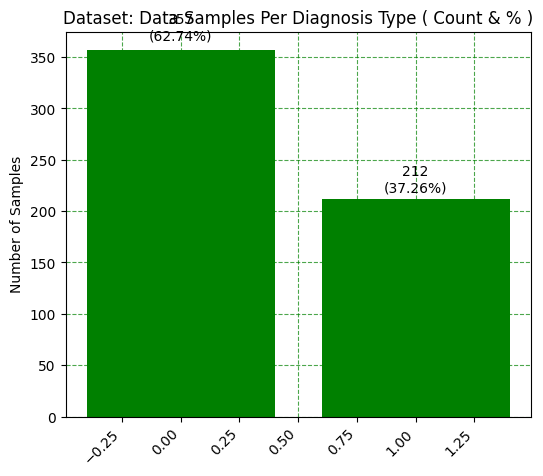

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count samples and percentages

diagnosis_count = df['diagnosis'].value_counts()
diagnosis_percentages = (diagnosis_count / diagnosis_count.sum()) * 100

# Set up the plot

plt.figure(figsize=(6,5))
bars = plt.bar(diagnosis_count.index, diagnosis_count.values, color=('green') ) # Bar color set to green

# Add count & percentage text above each bar

for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{diagnosis_count.values[idx]:,}'
    percent_text = f'({diagnosis_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.02*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels

plt.title("Dataset: Data Samples Per Diagnosis Type ( Count & % )", fontsize=12)
plt.ylabel('Number of Samples')
plt.xticks( rotation=45, ha='right')
# Enable both horizontal and vertical green grid lines

plt.grid( which="both", linestyle="--", alpha=0.7, color='green')
plt.tight_layout

# Show plot

plt.show()

In [62]:
# Create a correlation maxtrix

corr = df.corr()
corr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<Axes: >

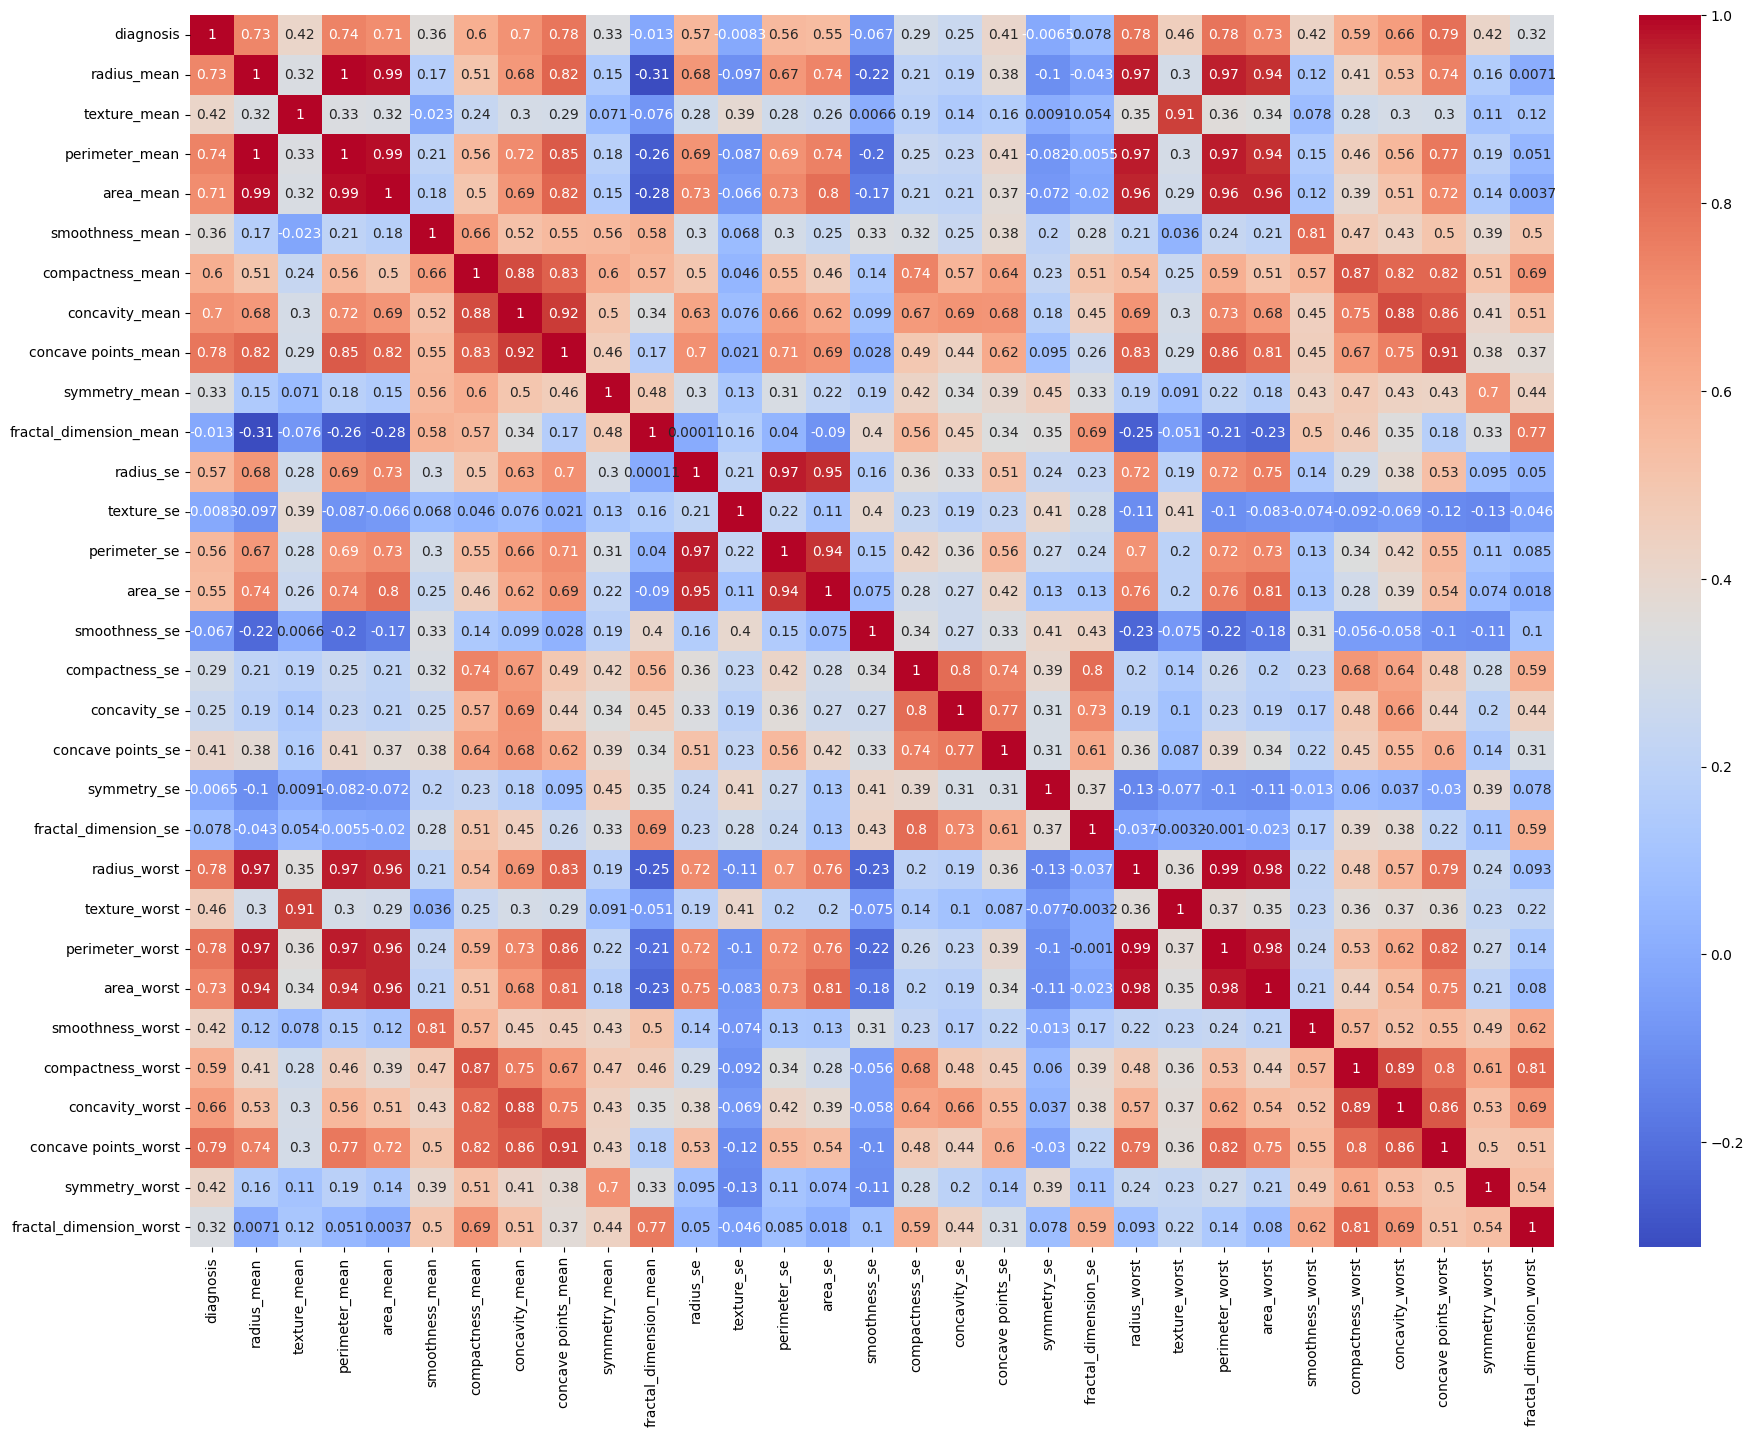

In [63]:
# Visualazing the correlation matrix(Heatmap)
corr = df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# **Feature Engineering**

Top 12 Important Features (SelectKBest):
                 Feature     F_Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063


/tmp/ipython-input-509985106.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_Score', y='Feature', data=top_features, palette='viridis')


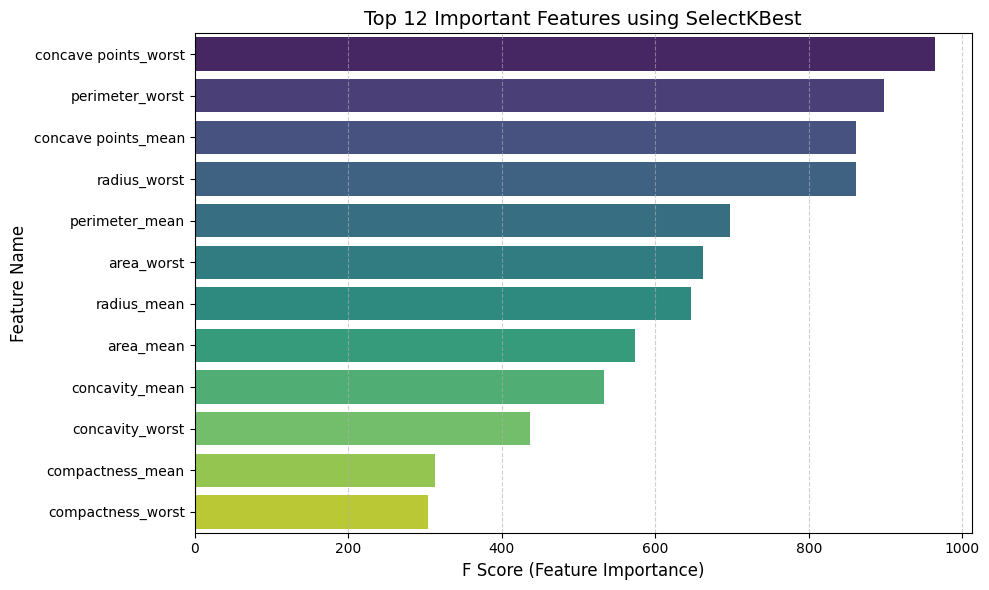

In [64]:

#Feature Selection & Visualization using SelectKBest

from sklearn.feature_selection import SelectKBest, f_classif

# Split features & target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Feature Selection using SelectKBest

selector = SelectKBest(score_func=f_classif, k=12)
selector.fit(X, y)

# Get selected feature names and scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

# Get top 10 features
top_features = scores.head(12)
print("Top 12 Important Features (SelectKBest):")
print(top_features)

#Visualization

plt.figure(figsize=(10, 6))
sns.barplot(x='F_Score', y='Feature', data=top_features, palette='viridis')
plt.title('Top 12 Important Features using SelectKBest', fontsize=14)
plt.xlabel('F Score (Feature Importance)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Classification Starts**

In [65]:
# Define label and feature columns

X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")


Data prepared:
X (measurements): (569, 30)
y (diagnosis): (569,)


# **Traing and Test Division**

In [66]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and target
    test_size=0.2,          # 20% test, 80% train
    random_state=42        # For reproducibility
)

# Confirm sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (455, 30)
X_test shape:  (114, 30)
y_train shape: (455,)
y_test shape:  (114,)


# **Model Training & Evaluation**

In [70]:

results = {}

# Define Model

models = {
    "LogisticRegression": LogisticRegression(max_iter=10000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),

}

print(f"\nTraining {len(models)} models...\n")

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"  ✓ Accuracy: {accuracy:.4f} | precision:{precision:.4f} | recall:{recall:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f} | CV: {cv_mean:.4f}±{cv_std:.4f}\n")






Training 11 models...

Training LogisticRegression...
  ✓ Accuracy: 0.9737 | precision:0.9737 | recall:0.9737 | F1: 0.9736 | ROC-AUC: 0.9974 | CV: 0.9758±0.0146

Training DecisionTree...
  ✓ Accuracy: 0.9474 | precision:0.9474 | recall:0.9474 | F1: 0.9474 | ROC-AUC: 0.9440 | CV: 0.9165±0.0179

Training SVM...
  ✓ Accuracy: 0.9737 | precision:0.9737 | recall:0.9737 | F1: 0.9736 | ROC-AUC: 0.9974 | CV: 0.9736±0.0164

Training KNN...
  ✓ Accuracy: 0.9474 | precision:0.9474 | recall:0.9474 | F1: 0.9474 | ROC-AUC: 0.9817 | CV: 0.9604±0.0215

Training NaiveBayes...
  ✓ Accuracy: 0.9649 | precision:0.9652 | recall:0.9649 | F1: 0.9647 | ROC-AUC: 0.9974 | CV: 0.9341±0.0209

Training RandomForest...
  ✓ Accuracy: 0.9649 | precision:0.9652 | recall:0.9649 | F1: 0.9647 | ROC-AUC: 0.9953 | CV: 0.9560±0.0155

Training ExtraTrees...
  ✓ Accuracy: 0.9649 | precision:0.9652 | recall:0.9649 | F1: 0.9647 | ROC-AUC: 0.9987 | CV: 0.9626±0.0204

Training GradientBoosting...
  ✓ Accuracy: 0.9561 | precision

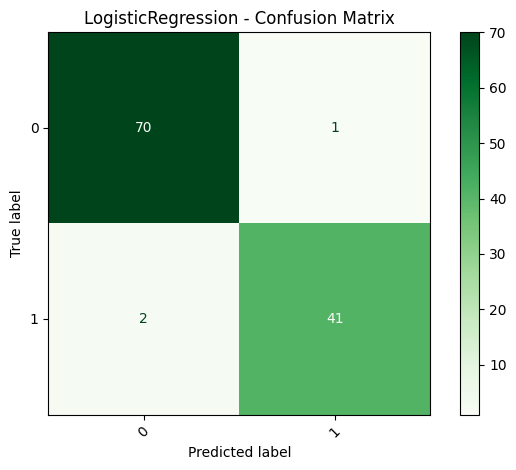

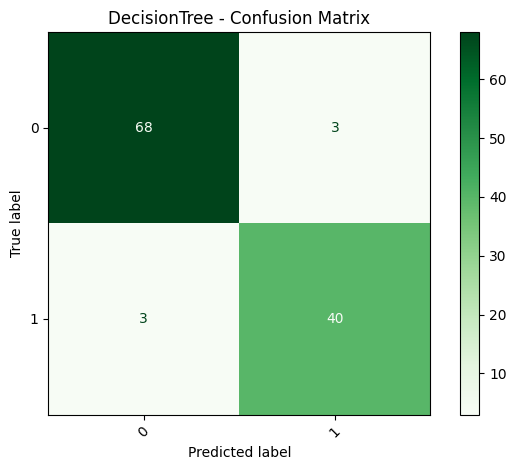

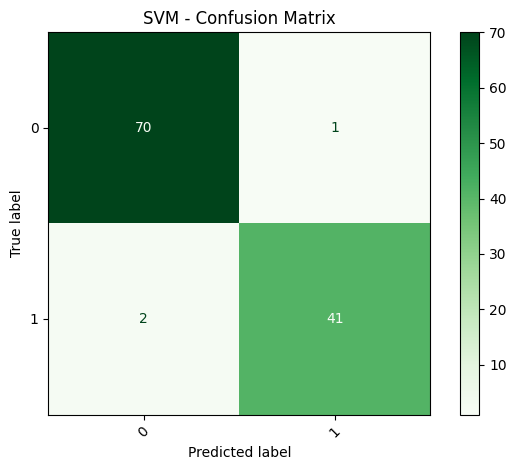

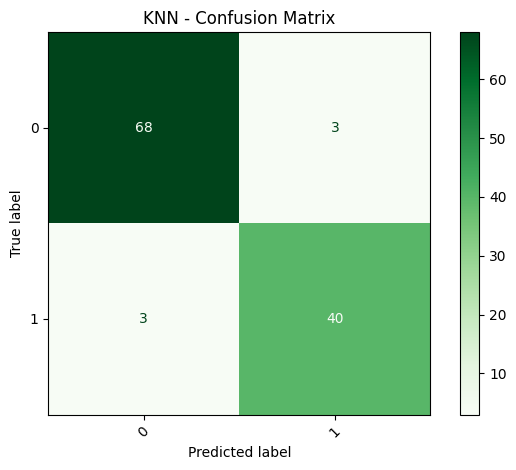

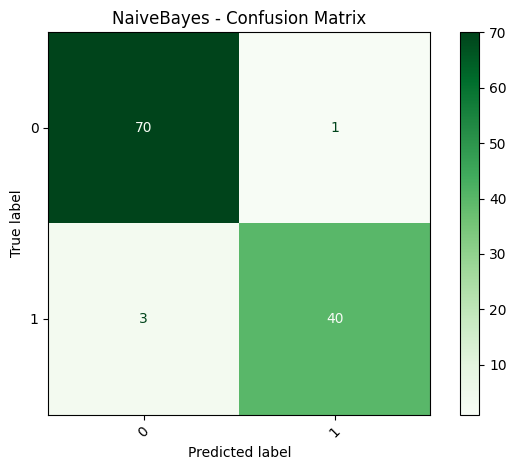

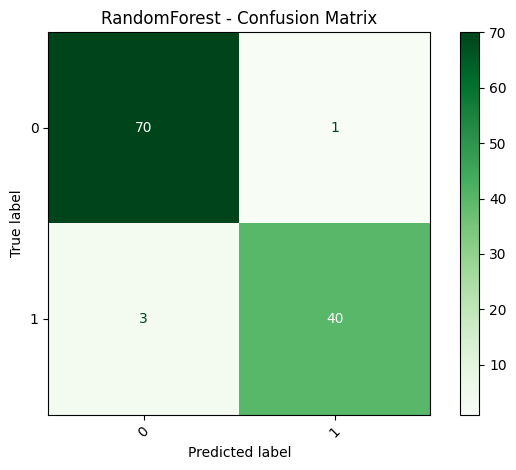

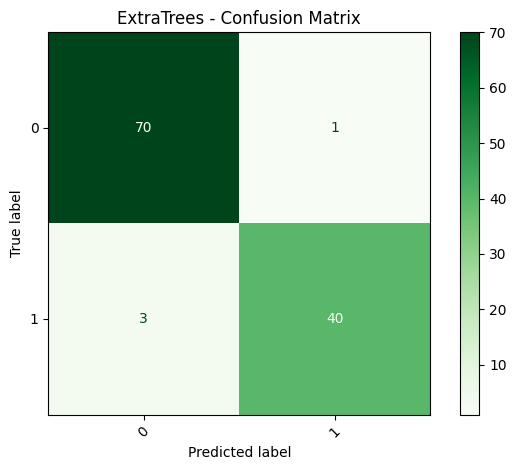

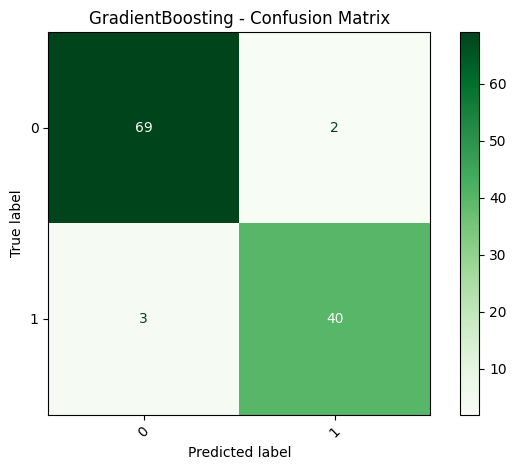

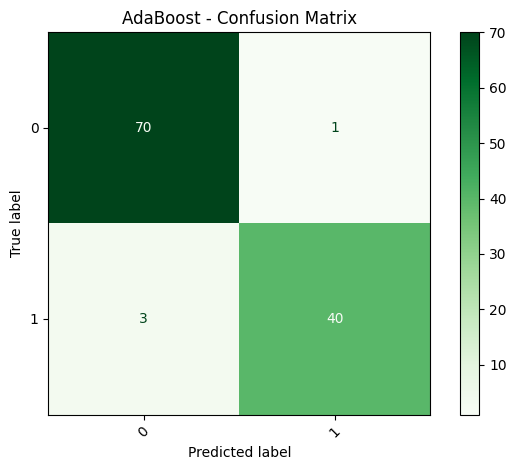

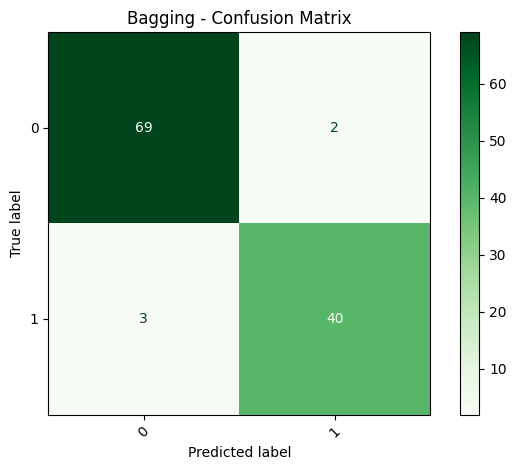

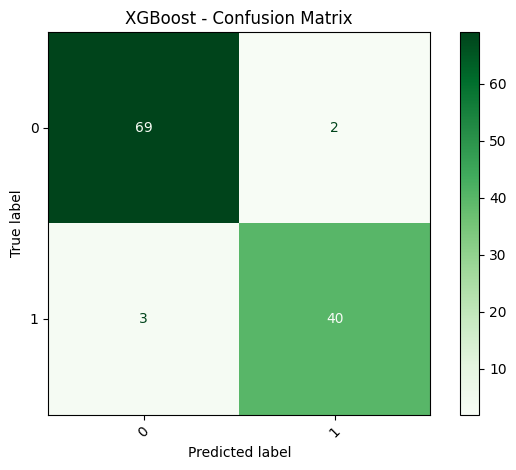

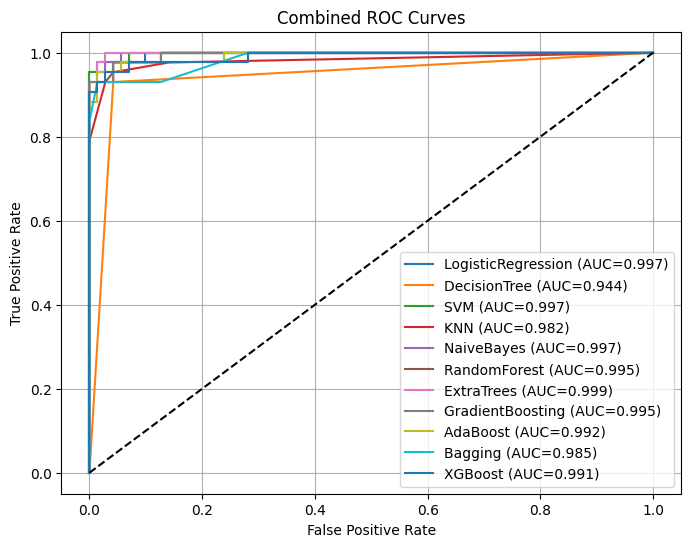

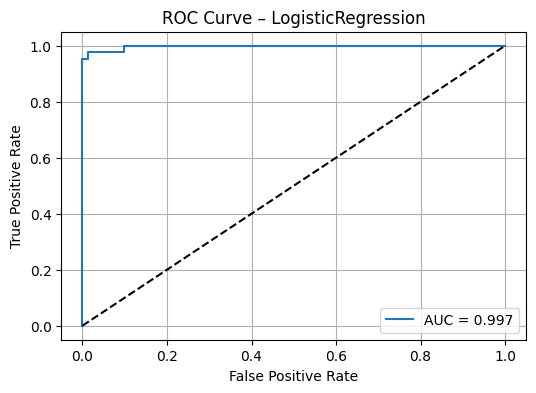

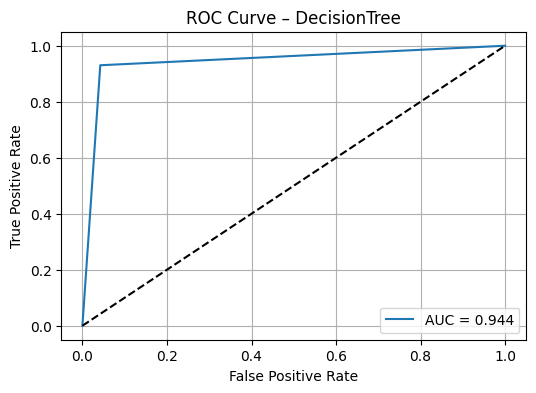

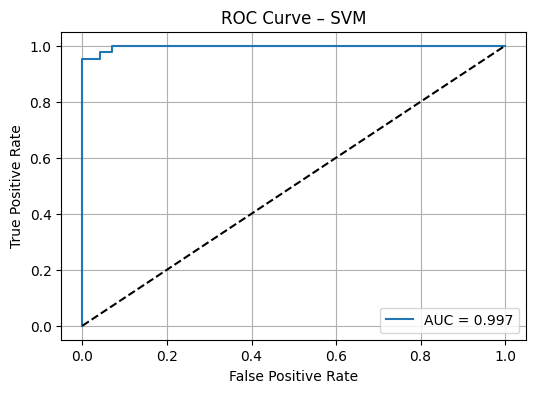

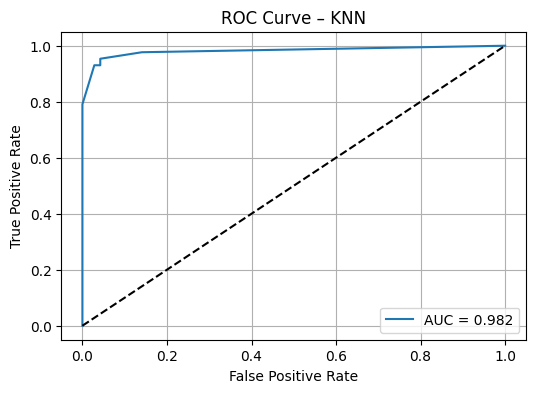

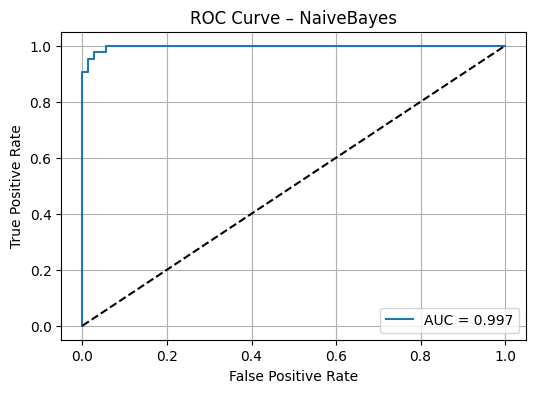

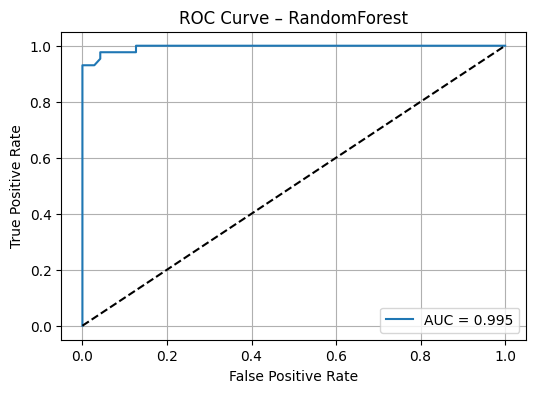

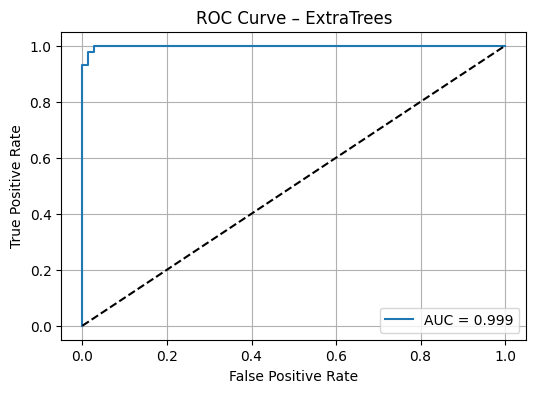

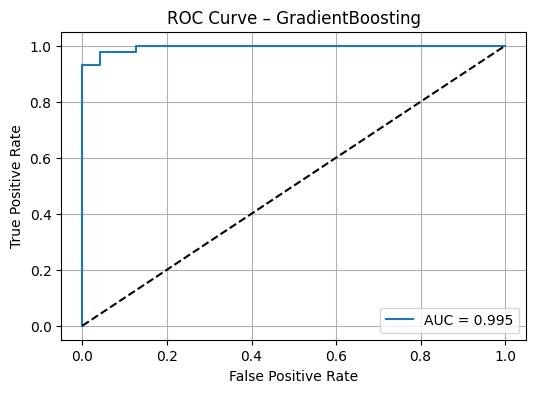

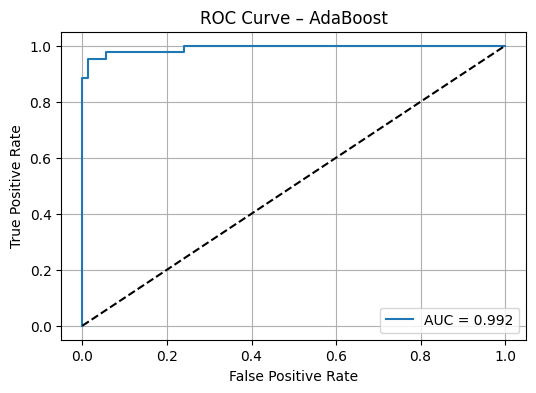

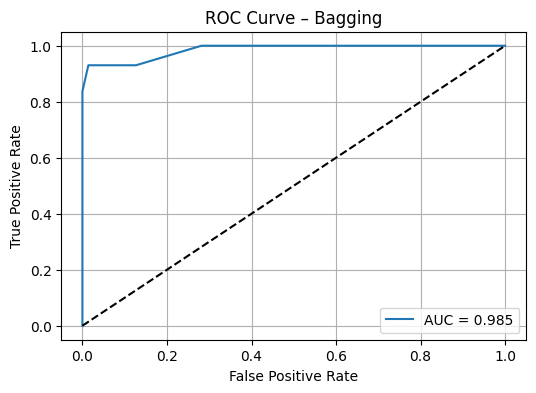

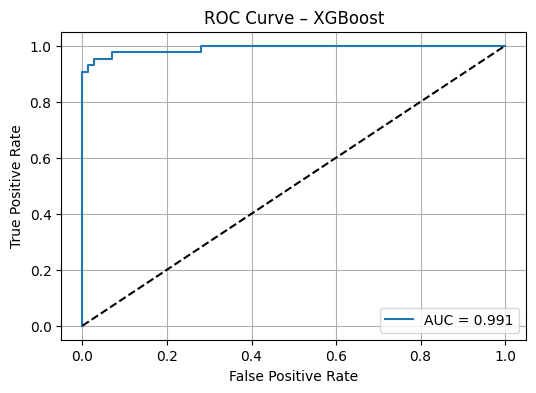

Generating Precision–Recall for LogisticRegression


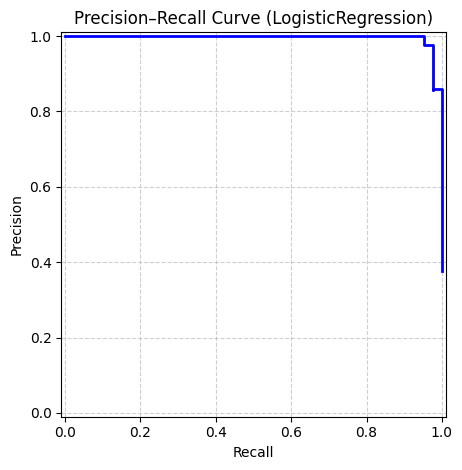

Generating Precision–Recall for DecisionTree


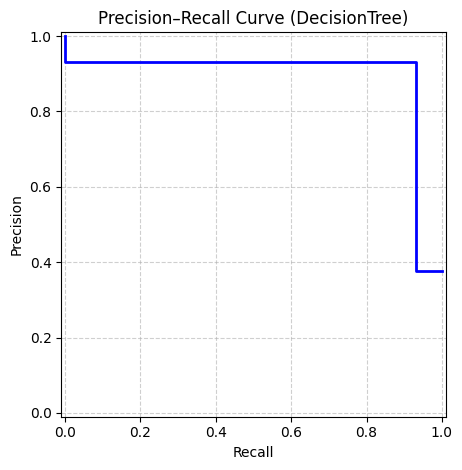

Generating Precision–Recall for SVM


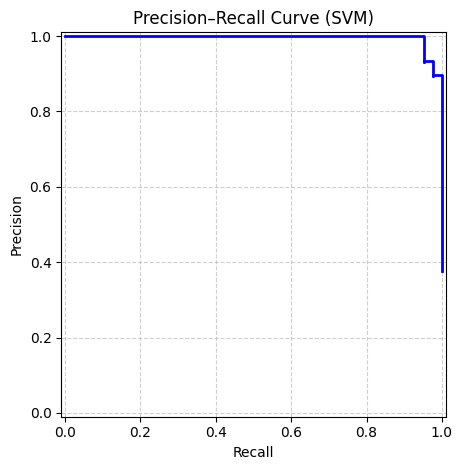

Generating Precision–Recall for KNN


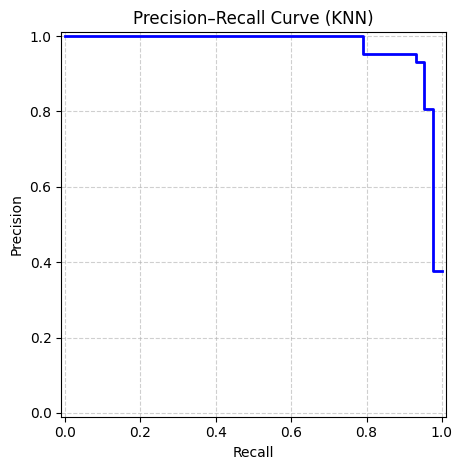

Generating Precision–Recall for NaiveBayes


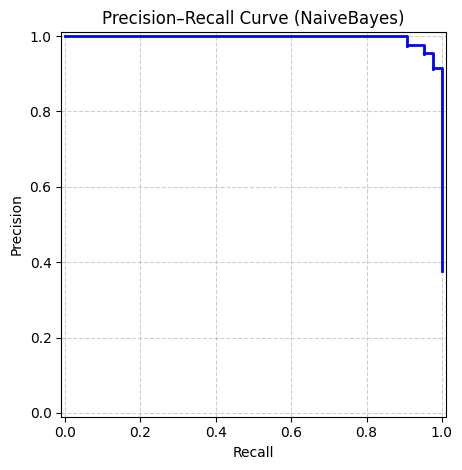

Generating Precision–Recall for RandomForest


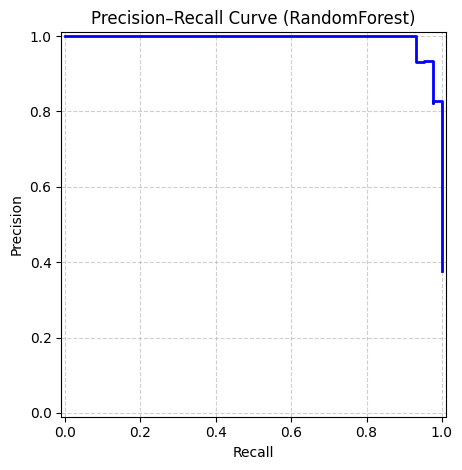

Generating Precision–Recall for ExtraTrees


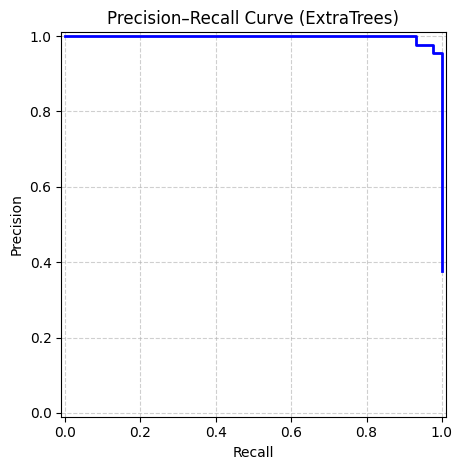

Generating Precision–Recall for GradientBoosting


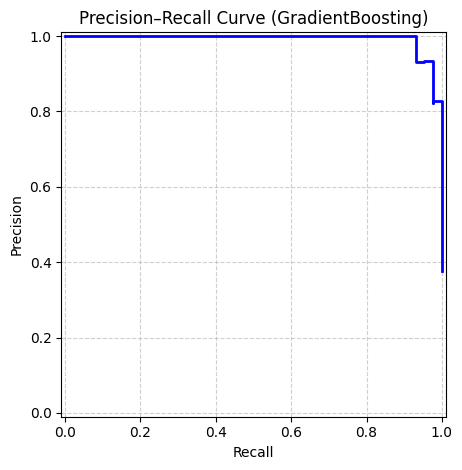

Generating Precision–Recall for AdaBoost


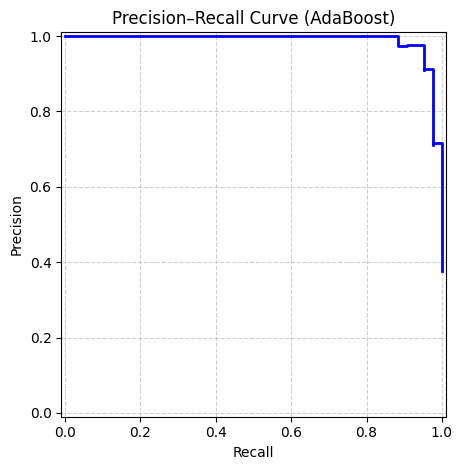

Generating Precision–Recall for Bagging


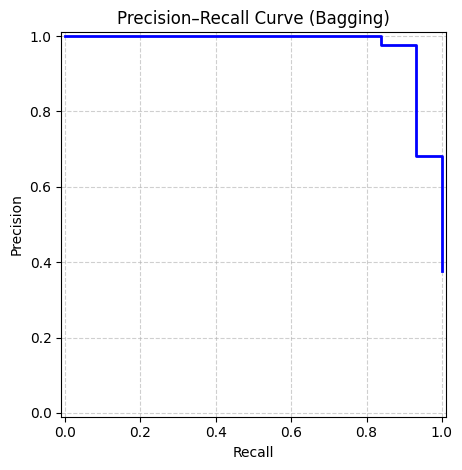

Generating Precision–Recall for XGBoost


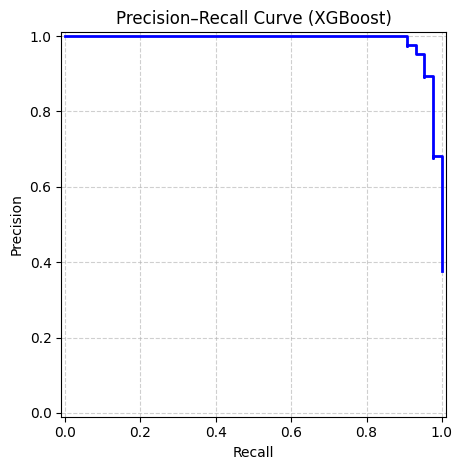

In [71]:
# CONFUSION MATRICES (INDIVIDUAL)

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Greens', xticks_rotation=45)
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Combined ROC Curves

plt.figure(figsize=(8,6))
plt.title("Combined ROC Curves")

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# ROC Curves(INDIVIDUAL)
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {name}")
    plt.legend()
    plt.grid()
    plt.show()



# PRECISION–RECALL CURVES (INDIVIDUAL)

for name, model in models.items():
    print(f"Generating Precision–Recall for {name}")
    model.fit(X_train, y_train)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except:
        y_prob = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot(color='blue', lw=2)
    plt.title(f'Precision–Recall Curve ({name})')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# **Model Comparison**


             Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  CV Mean   CV Std
LogisticRegression  0.973684   0.973719 0.973684  0.973621 0.997380 0.975824 0.014579
               SVM  0.973684   0.973719 0.973684  0.973621 0.997380 0.973626 0.016447
        NaiveBayes  0.964912   0.965205 0.964912  0.964738 0.997380 0.934066 0.020850
        ExtraTrees  0.964912   0.965205 0.964912  0.964738 0.998690 0.962637 0.020382
      RandomForest  0.964912   0.965205 0.964912  0.964738 0.995251 0.956044 0.015541
          AdaBoost  0.964912   0.965205 0.964912  0.964738 0.992139 0.980220 0.010767
           Bagging  0.956140   0.956088 0.956140  0.956036 0.985097 0.940659 0.008791
           XGBoost  0.956140   0.956088 0.956140  0.956036 0.990829 0.964835 0.014579
  GradientBoosting  0.956140   0.956088 0.956140  0.956036 0.995087 0.951648 0.016447
      DecisionTree  0.947368   0.947368 0.947368  0.947368 0.943990 0.916484 0.017855
               KNN  0.947368   0.947368 0.947368  0.9

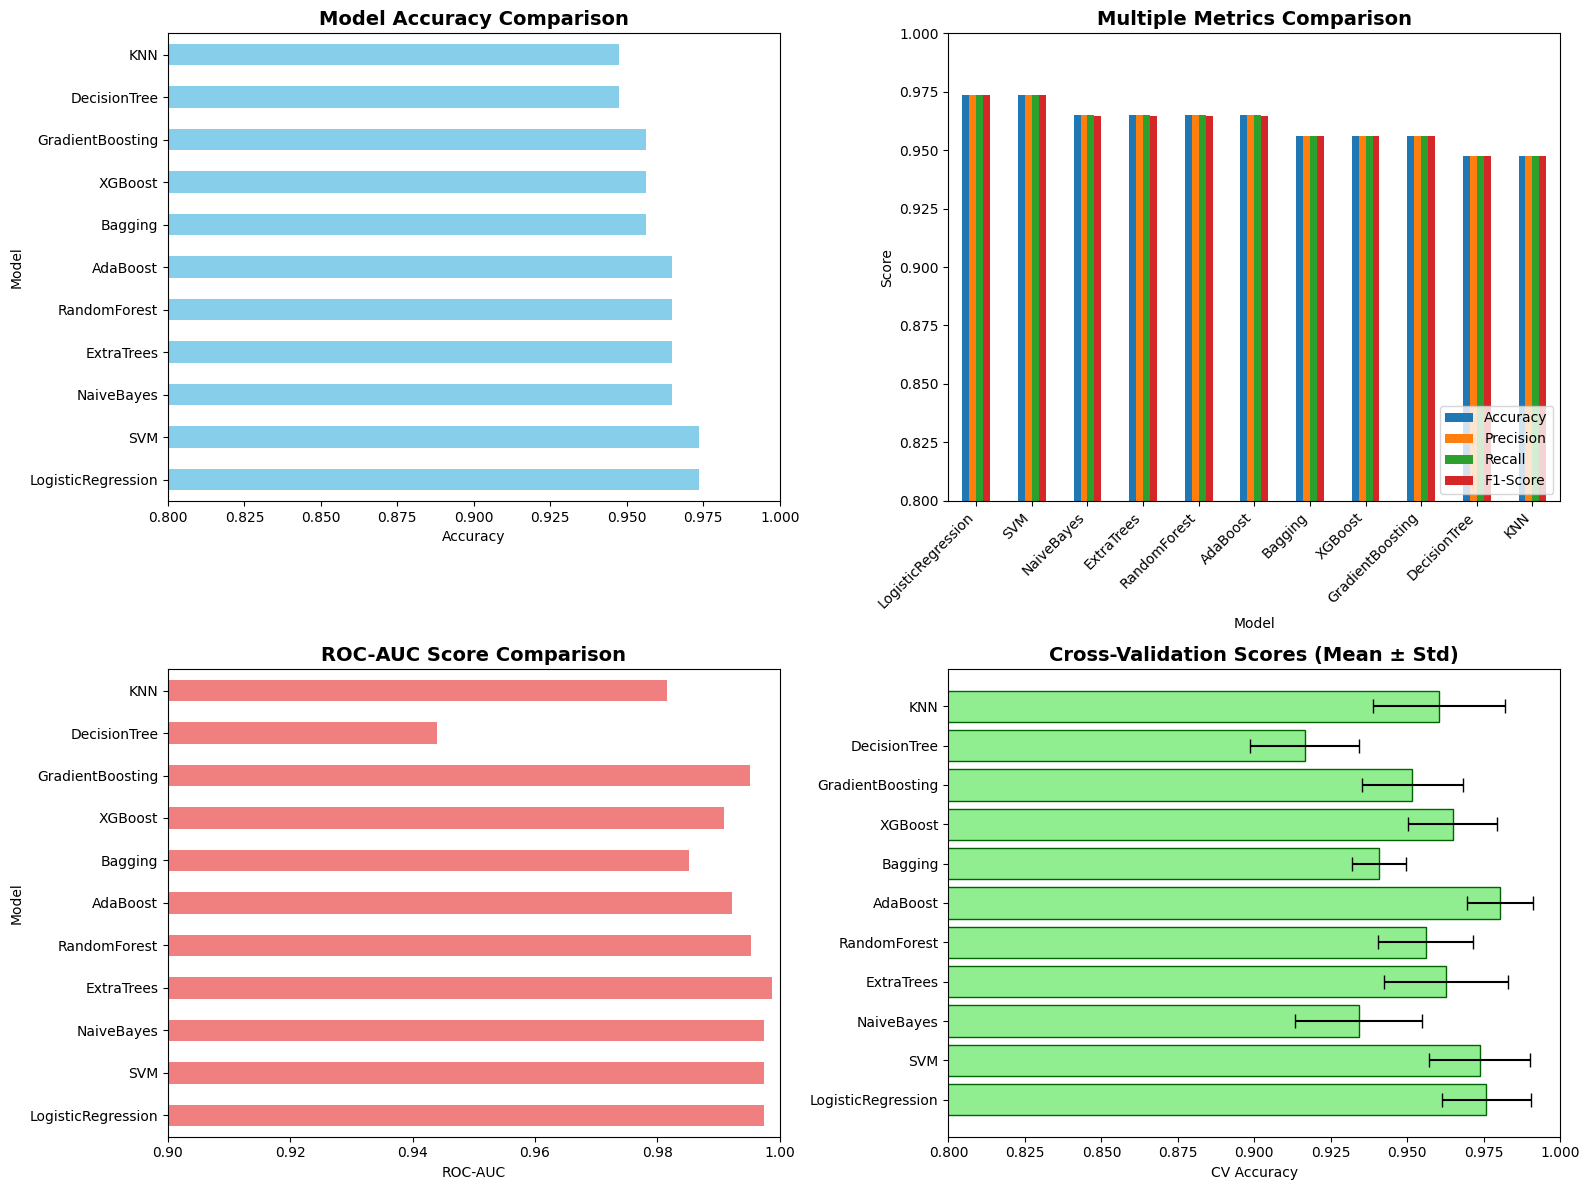

In [72]:
# MODEL COMPARISON

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()],
    'CV Mean': [results[m]['cv_mean'] for m in results.keys()],
    'CV Std': [results[m]['cv_std'] for m in results.keys()]
}).sort_values('F1-Score', ascending=False)

print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"   Precision: {comparison_df.iloc[0]['Precision']:.4f}")
print(f"   Recall: {comparison_df.iloc[0]['Recall']:.4f}")
print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"   ROC-AUC: {comparison_df.iloc[0]['ROC-AUC']:.4f}")

# Visualization - Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
ax1 = axes[0, 0]
comparison_df.plot(x='Model', y='Accuracy', kind='barh', ax=ax1, color='skyblue', legend=False)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Accuracy')
ax1.set_xlim([0.8, 1.0])

# 2. Multiple metrics comparison
ax2 = axes[0, 1]
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_df.set_index('Model')[metrics_to_plot].plot(kind='bar', ax=ax2)
ax2.set_title('Multiple Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_xlabel('Model')
ax2.legend(loc='lower right')
ax2.set_ylim([0.8, 1.0])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. ROC-AUC comparison
ax3 = axes[1, 0]
comparison_df.plot(x='Model', y='ROC-AUC', kind='barh', ax=ax3, color='lightcoral', legend=False)
ax3.set_title('ROC-AUC Score Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('ROC-AUC')
ax3.set_xlim([0.9, 1.0])

# 4. Cross-validation scores with error bars
ax4 = axes[1, 1]
ax4.barh(comparison_df['Model'], comparison_df['CV Mean'], xerr=comparison_df['CV Std'],
         color='lightgreen', edgecolor='darkgreen', capsize=5)
ax4.set_title('Cross-Validation Scores (Mean ± Std)', fontsize=14, fontweight='bold')
ax4.set_xlabel('CV Accuracy')
ax4.set_xlim([0.8, 1.0])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Model comparison plot saved as 'model_comparison.png'")
plt.show()

## **Detailed Evaluation**

DETAILED EVALUATION - LogisticRegression

1. Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


2. Confusion Matrix:
--------------------------------------------------
[[70  1]
 [ 2 41]]

True Negatives: 70
False Positives: 1
False Negatives: 2
True Positives: 41

✓ Detailed evaluation plot saved as 'detailed_evaluation.png'


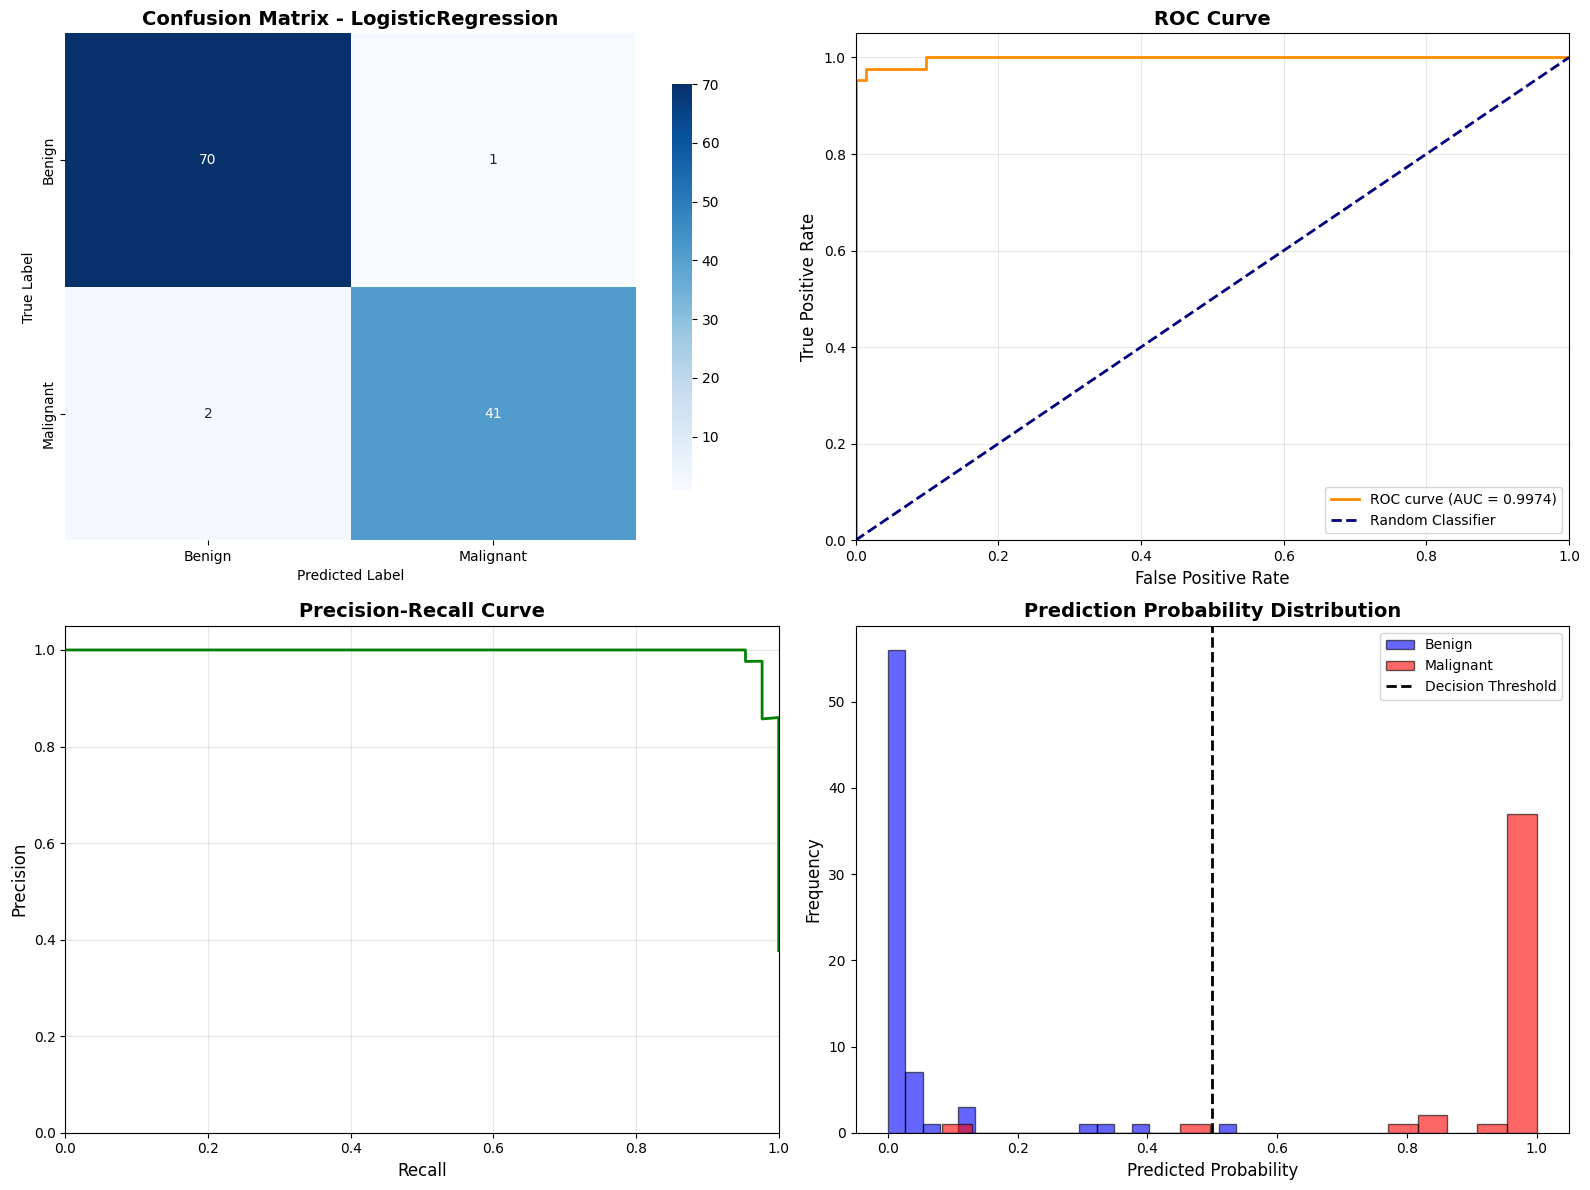

In [73]:
# DETAILED EVALUATION
print(f"DETAILED EVALUATION - {best_model_name}")
y_pred_best = results[best_model_name]['y_pred']
y_pred_proba_best = results[best_model_name]['y_pred_proba']

# Classification Report
print("\n1. Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant']))

# Confusion Matrix
print("\n2. Confusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred_best)
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# Visualization - Detailed Evaluation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
ax1.set_xticklabels(['Benign', 'Malignant'])
ax1.set_yticklabels(['Benign', 'Malignant'])

# 2. ROC Curve
ax2 = axes[0, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

# 3. Precision-Recall Curve
ax3 = axes[1, 0]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best)
ax3.plot(recall, precision, color='green', lw=2)
ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Precision', fontsize=12)
ax3.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.grid(alpha=0.3)

# 4. Prediction Probability Distribution
ax4 = axes[1, 1]
ax4.hist(y_pred_proba_best[y_test == 0], bins=20, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax4.hist(y_pred_proba_best[y_test == 1], bins=20, alpha=0.6, label='Malignant', color='red', edgecolor='black')
ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
ax4.set_xlabel('Predicted Probability', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig('detailed_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✓ Detailed evaluation plot saved as 'detailed_evaluation.png'")
plt.show()

# **Hyperparameter Tuning**

In [74]:
# HYPERPARAMETER TUNING
print(f"\nTuning best model: {best_model_name}...")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'num_leaves': [31, 50, 70]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf', 'poly']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
}

if best_model_name in param_grids:
    param_grid = param_grids[best_model_name]

    print(f"\nSearching hyperparameters:")
    for key, values in param_grid.items():
        print(f"  {key}: {values}")

    # Grid Search
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"\n✓ Best parameters found:")
    for key, value in grid_search.best_params_.items():
        print(f"  {key}: {value}")

    print(f"\n✓ Best cross-validation score: {grid_search.best_score_:.4f}")

    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test)
    y_pred_proba_tuned = tuned_model.predict_proba(X_test)[:, 1]

    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned)
    roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

    print(f"\n📊 Tuned Model Performance:")
    print(f"  Accuracy: {accuracy_tuned:.4f}")
    print(f"  F1-Score: {f1_tuned:.4f}")
    print(f"  ROC-AUC: {roc_auc_tuned:.4f}")

    print(f"\n📈 Improvement:")
    print(f"  Accuracy: {(accuracy_tuned - results[best_model_name]['accuracy'])*100:+.2f}%")
    print(f"  F1-Score: {(f1_tuned - results[best_model_name]['f1'])*100:+.2f}%")
    print(f"  ROC-AUC: {(roc_auc_tuned - results[best_model_name]['roc_auc'])*100:+.2f}%")

    # Update best model
    best_model = tuned_model

else:
    print(f"\nNo parameter grid defined for {best_model_name}")
    print("Using original model...")
    tuned_model = best_model


Tuning best model: LogisticRegression...

No parameter grid defined for LogisticRegression
Using original model...


# **Ensemble Model**

In [80]:
# ENSEMBLE MODEL
print("\nCreating Voting Ensemble from top 2 models...")

# Get top 2 models
top_2_models = comparison_df.head(2)['Model'].tolist()
print(f"Top 2 models: {', '.join(top_2_models)}")

# Create voting classifier
estimators = [(name, results[name]['model']) for name in top_2_models]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train ensemble
voting_clf.fit(X_train, y_train)

# Predict
y_pred_ensemble = voting_clf.predict(X_test)
y_pred_proba_ensemble = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate ensemble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

print(f"\n📊 Ensemble Model Performance:")
print(f"  Accuracy:  {accuracy_ensemble:.4f}")
print(f"  Precision: {precision_ensemble:.4f}")
print(f"  Recall:    {recall_ensemble:.4f}")
print(f"  F1-Score:  {f1_ensemble:.4f}")
print(f"  ROC-AUC:   {roc_auc_ensemble:.4f}")

# Compare with best single model
print(f"\n📈 Ensemble vs Best Single Model ({best_model_name}):")
print(f"  Accuracy:  {(accuracy_ensemble - results[best_model_name]['accuracy'])*100:+.2f}%")
print(f"  F1-Score:  {(f1_ensemble - results[best_model_name]['f1'])*100:+.2f}%")
print(f"  ROC-AUC:   {(roc_auc_ensemble - results[best_model_name]['roc_auc'])*100:+.2f}%")

# Use ensemble if it's better
if f1_ensemble > f1_tuned:
    print("\n✓ Ensemble model performs better - using ensemble as final model")
    final_model = voting_clf
    final_model_name = "Ensemble (Voting)"
    y_pred_final = y_pred_ensemble
    y_pred_proba_final = y_pred_proba_ensemble
else:
    print(f"\n✓ Tuned {best_model_name} performs better - using as final model")
    final_model = tuned_model
    final_model_name = f"Tuned {best_model_name}"
    y_pred_final = y_pred_tuned
    y_pred_proba_final = y_pred_proba_tuned


Creating Voting Ensemble from top 2 models...
Top 2 models: LogisticRegression, SVM

📊 Ensemble Model Performance:
  Accuracy:  0.9825
  Precision: 1.0000
  Recall:    0.9535
  F1-Score:  0.9762
  ROC-AUC:   0.9974

📈 Ensemble vs Best Single Model (LogisticRegression):
  Accuracy:  +0.88%
  F1-Score:  +0.26%
  ROC-AUC:   +0.00%

✓ Ensemble model performs better - using ensemble as final model


# **Explainable AI (XAI)**

In [76]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7722c5f4299abc8a6ee1063c139ef82de40d0b7a9833c3b1066c302bdf210d5f
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [77]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [82]:
from lime import lime_tabular

# Initialize explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],  # or use list(model.classes_) if applicable
    mode='classification'
)

# Explain one sample (you can change index)
sample_index = 12
exp = explainer.explain_instance(
    data_row=X_test.iloc[sample_index],
    predict_fn=final_model.predict_proba
)

# Show explanation
exp.show_in_notebook(show_table=True)


Running SHAP for Final Model...


PermutationExplainer explainer: 115it [01:00,  1.55it/s]


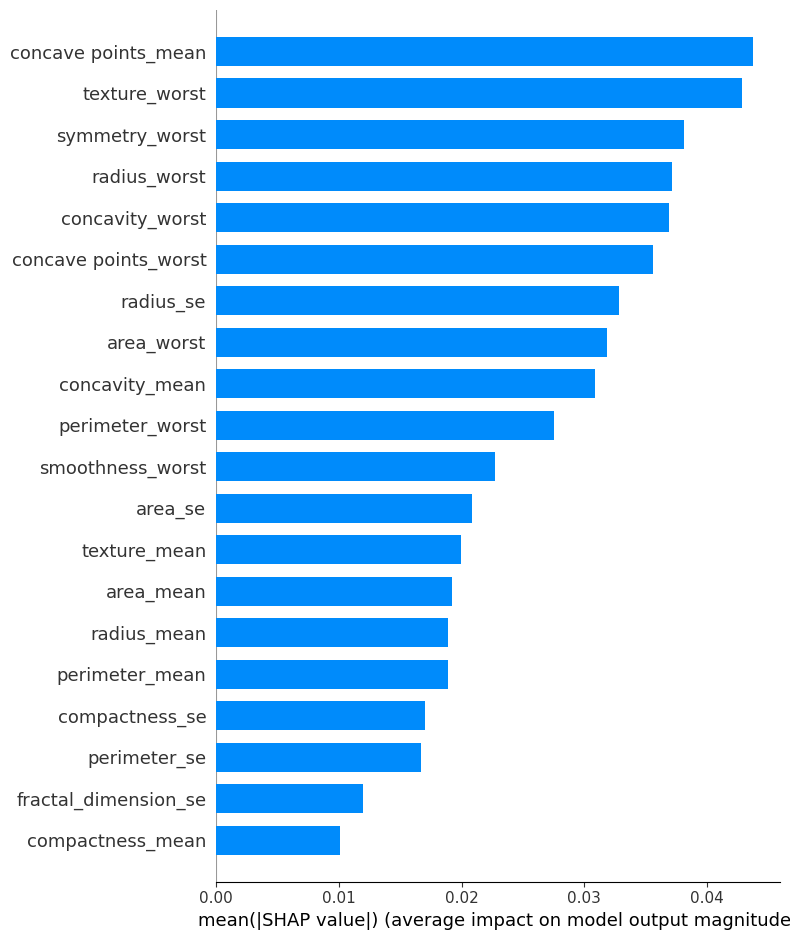

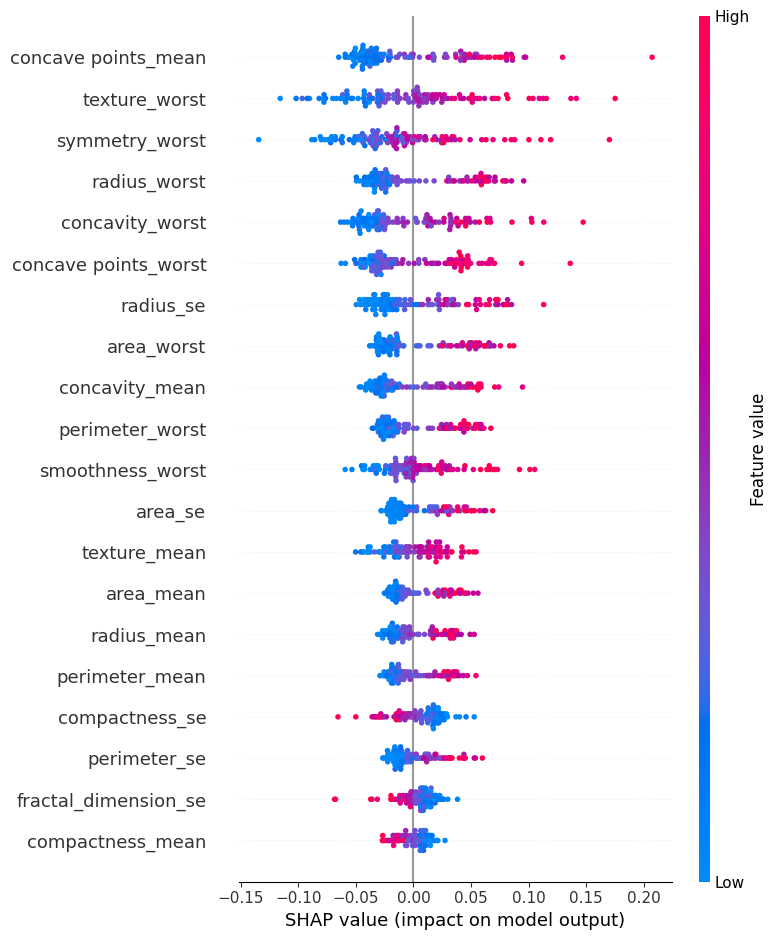

In [100]:
import shap

print("\nRunning SHAP for Final Model...")

# 1) Convert to numpy ONLY for model input — but keep pandas for feature names
X_train_np = X_train.values
X_test_np = X_test.values
feature_names = X_train.columns

# 2) Create SHAP explainer
explainer = shap.Explainer(
    final_model.predict_proba,
    X_train_np,
    feature_names=feature_names
)

# 3) Calculate SHAP values
shap_values = explainer(X_test_np)

# ---------------- GLOBAL IMPORTANCE ----------------
shap.summary_plot(
    shap_values[..., 1],
    features=X_test,             # keep dataframe → keeps feature names
    feature_names=feature_names,
    plot_type="bar"
)

# ---------------- BEESWARM PLOT ----------------
shap.summary_plot(
    shap_values[..., 1],
    features=X_test,
    feature_names=feature_names
)



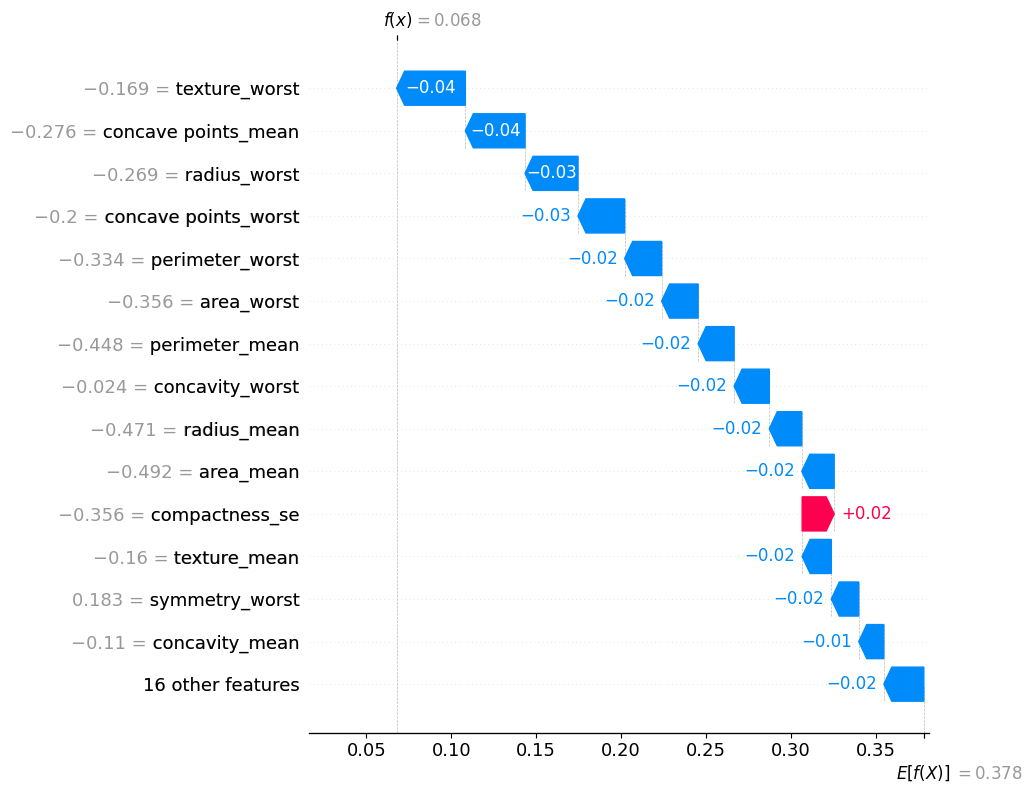

In [109]:
import shap

# Choose which sample to explain
sample_index = 0        # index of the test sample
class_index = 1         # class 1 = malignant

# Extract the SHAP values for this instance
instance_shap_values = shap_values[sample_index, :, class_index] \
                       if len(shap_values.shape) == 3 else shap_values[sample_index].values[:, class_index]

# Build an Explanation object
expl = shap.Explanation(
    values = instance_shap_values,
    base_values = shap_values.base_values[sample_index][class_index],
    data = X_test.iloc[sample_index].values,
    feature_names = X_test.columns
)

# Plot the waterfall
shap.plots.waterfall(expl, max_display=15)


# **Final Model Summary**

In [110]:
# FINAL MODEL SUMMARY
print(f"\nFinal Model: {final_model_name}")
print("="*50)

# Final metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n📊 Performance Metrics:")
print(f"  Accuracy:  {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"  Precision: {final_precision:.4f} ({final_precision*100:.2f}%)")
print(f"  Recall:    {final_recall:.4f} ({final_recall*100:.2f}%)")
print(f"  F1-Score:  {final_f1:.4f} ({final_f1*100:.2f}%)")
print(f"  ROC-AUC:   {final_roc_auc:.4f} ({final_roc_auc*100:.2f}%)")

# Final confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)
print(f"\n📋 Confusion Matrix:")
print(f"  True Negatives:  {cm_final[0,0]} (Correctly predicted Benign)")
print(f"  False Positives: {cm_final[0,1]} (Benign predicted as Malignant)")
print(f"  False Negatives: {cm_final[1,0]} (Malignant predicted as Benign) ⚠️")
print(f"  True Positives:  {cm_final[1,1]} (Correctly predicted Malignant)")

# Calculate additional metrics
tn, fp, fn, tp = cm_final.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"\n🎯 Clinical Metrics:")
print(f"  Sensitivity (True Positive Rate):  {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"  Specificity (True Negative Rate):  {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  Positive Predictive Value (PPV):   {ppv:.4f} ({ppv*100:.2f}%)")
print(f"  Negative Predictive Value (NPV):   {npv:.4f} ({npv*100:.2f}%)")

# Misclassification analysis
print(f"\n⚠️ Misclassification Analysis:")
print(f"  Total Misclassifications: {fp + fn} out of {len(y_test)}")
print(f"  Misclassification Rate: {((fp + fn) / len(y_test))*100:.2f}%")
print(f"\n  Critical Errors (False Negatives): {fn}")
print(f"    → Malignant cases missed: {(fn / (tp + fn))*100:.2f}% of all malignant")
print(f"\n  False Alarms (False Positives): {fp}")
print(f"    → Benign cases flagged: {(fp / (tn + fp))*100:.2f}% of all benign")


Final Model: Ensemble (Voting)

📊 Performance Metrics:
  Accuracy:  0.9825 (98.25%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9535 (95.35%)
  F1-Score:  0.9762 (97.62%)
  ROC-AUC:   0.9974 (99.74%)

📋 Confusion Matrix:
  True Negatives:  71 (Correctly predicted Benign)
  False Positives: 0 (Benign predicted as Malignant)
  False Negatives: 2 (Malignant predicted as Benign) ⚠️
  True Positives:  41 (Correctly predicted Malignant)

🎯 Clinical Metrics:
  Sensitivity (True Positive Rate):  0.9535 (95.35%)
  Specificity (True Negative Rate):  1.0000 (100.00%)
  Positive Predictive Value (PPV):   1.0000 (100.00%)
  Negative Predictive Value (NPV):   0.9726 (97.26%)

⚠️ Misclassification Analysis:
  Total Misclassifications: 2 out of 114
  Misclassification Rate: 1.75%

  Critical Errors (False Negatives): 2
    → Malignant cases missed: 4.65% of all malignant

  False Alarms (False Positives): 0
    → Benign cases flagged: 0.00% of all benign


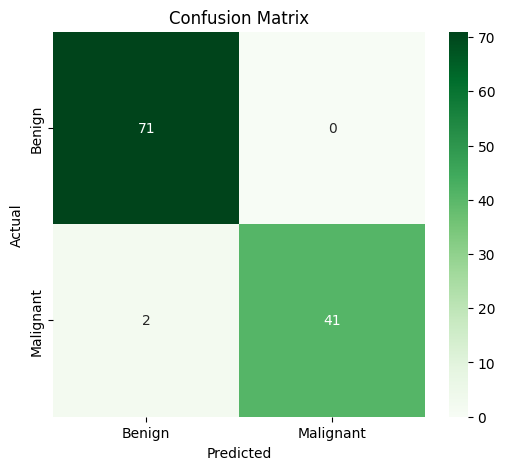

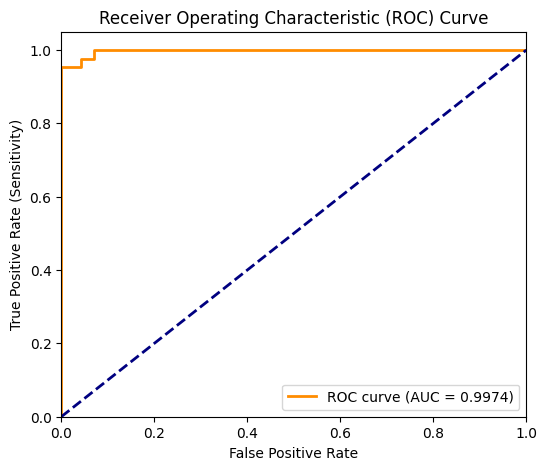

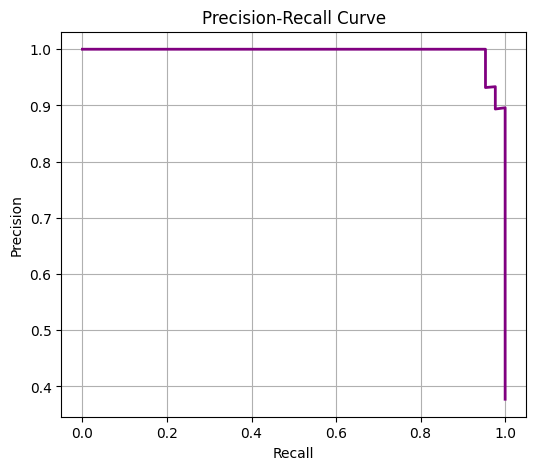

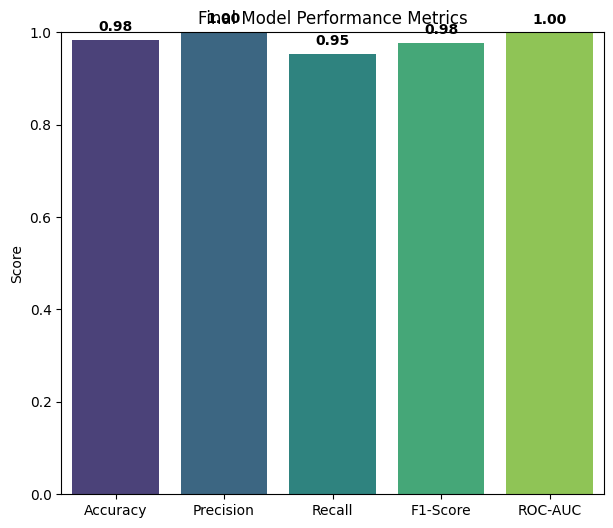

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# -------------------------
# 1) Confusion Matrix Heatmap
# -------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -------------------------
# 2) ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# -------------------------
# 3) Precision-Recall Curve
# -------------------------
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_final)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# -------------------------
# 4) Accuracy Visualization
# -------------------------
plt.figure(figsize=(7,6))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
            y=[final_accuracy, final_precision, final_recall, final_f1, final_roc_auc],
            palette='viridis')
plt.ylim(0,1)
plt.title('Final Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate([final_accuracy, final_precision, final_recall, final_f1, final_roc_auc]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


